In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

Loading the dataset:

In [3]:
df = pd.read_csv('Customer_Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.shape

(8950, 18)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [71]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Filling the missing values in the dataset with their mean value.
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [9]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [10]:
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

Plotting the kde for various features in the dataset

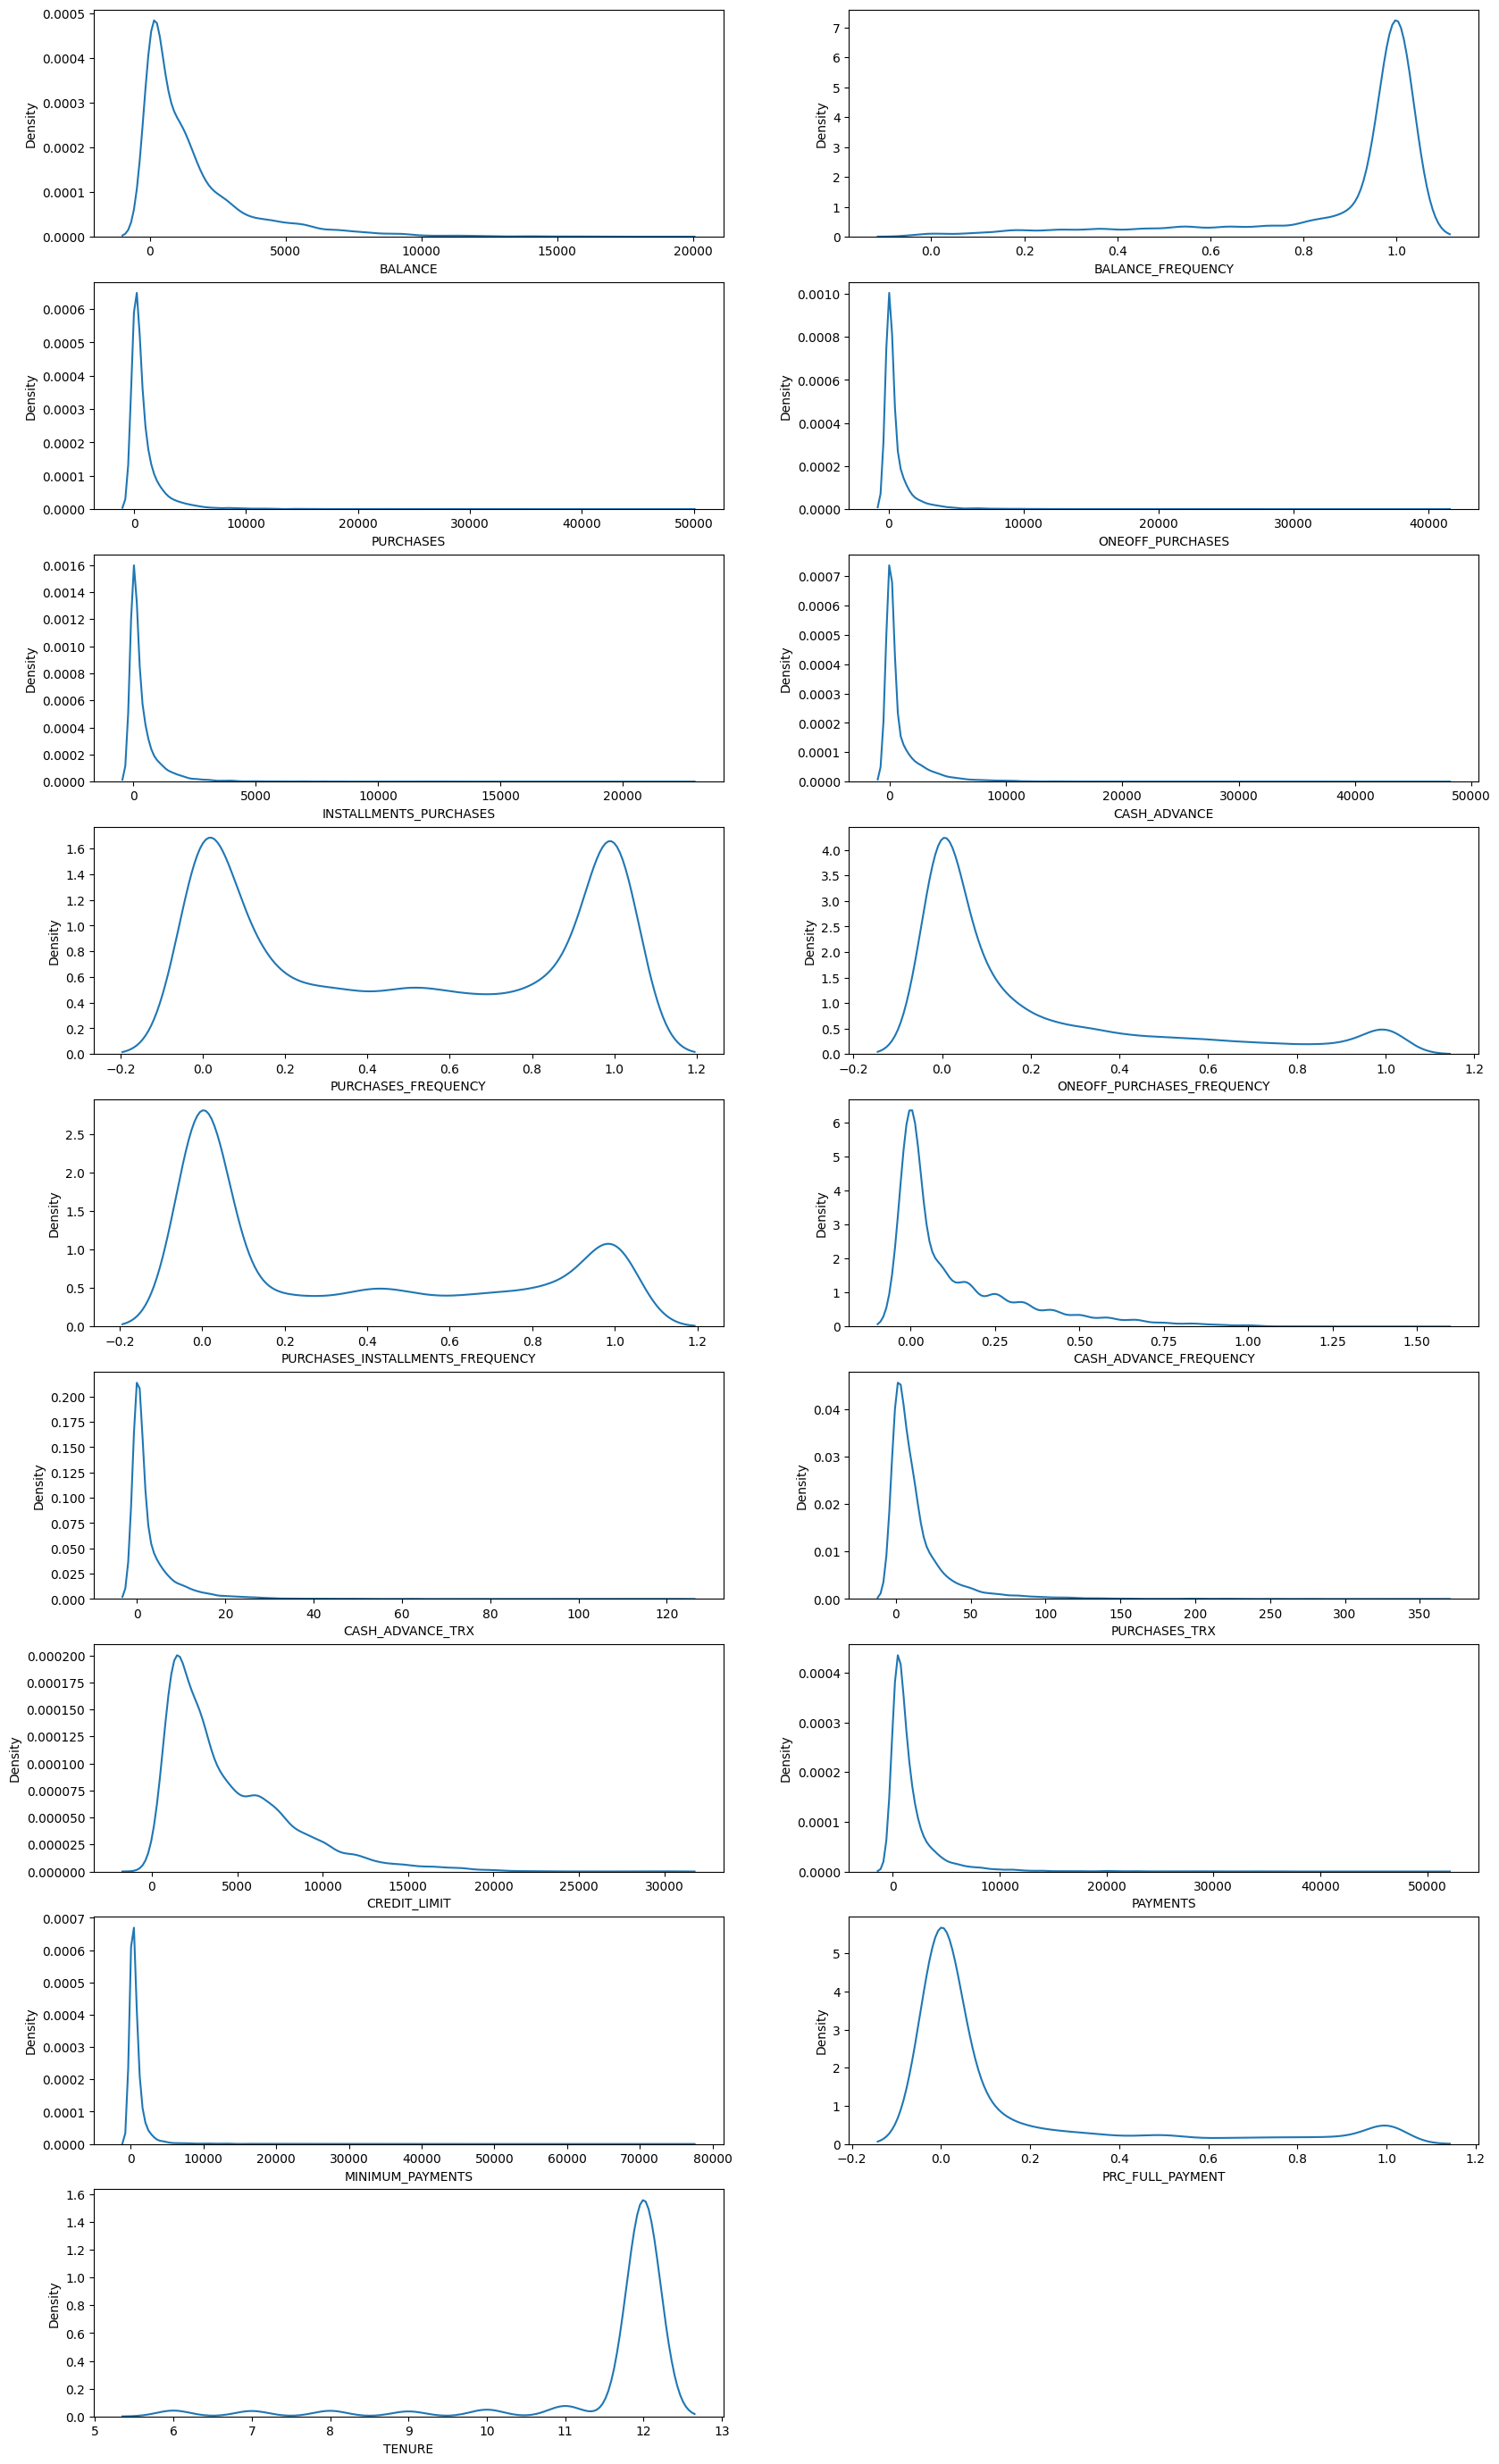

In [11]:
plt.figure(figsize = (20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype !='object':
        ax = plt.subplot(9,2, i+1)
        sns.kdeplot(df[col], ax =ax)
        plt.xlabel(col)
plt.show()
    
           

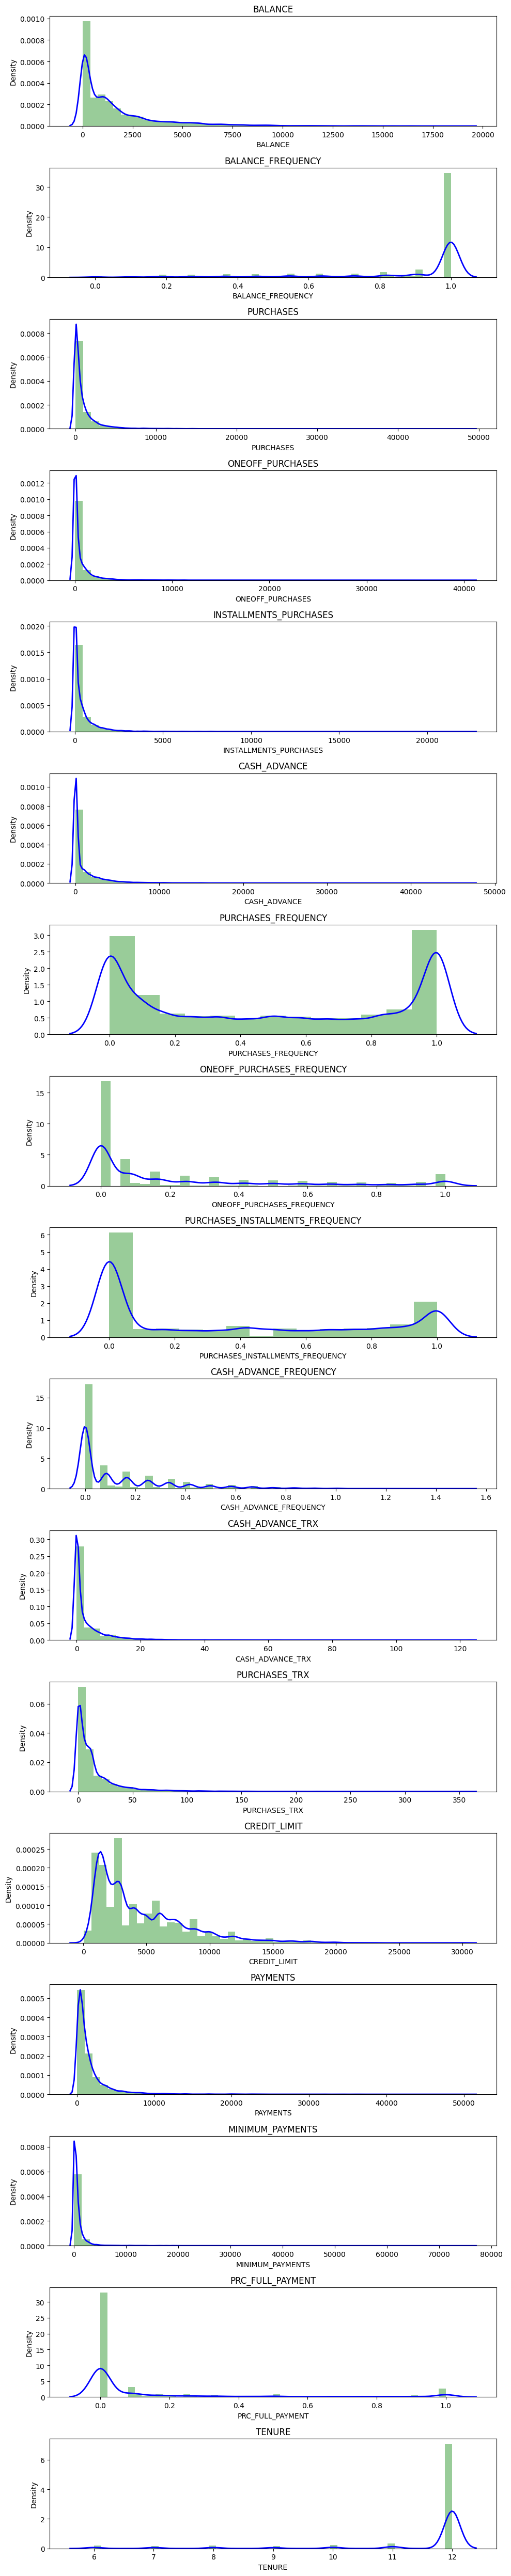

In [12]:
plt.figure(figsize=(10,50))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]], kde_kws = {'color':'b', 'bw' : 0.1,'lw': 2,'label': 'KDE'}, hist_kws = {'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

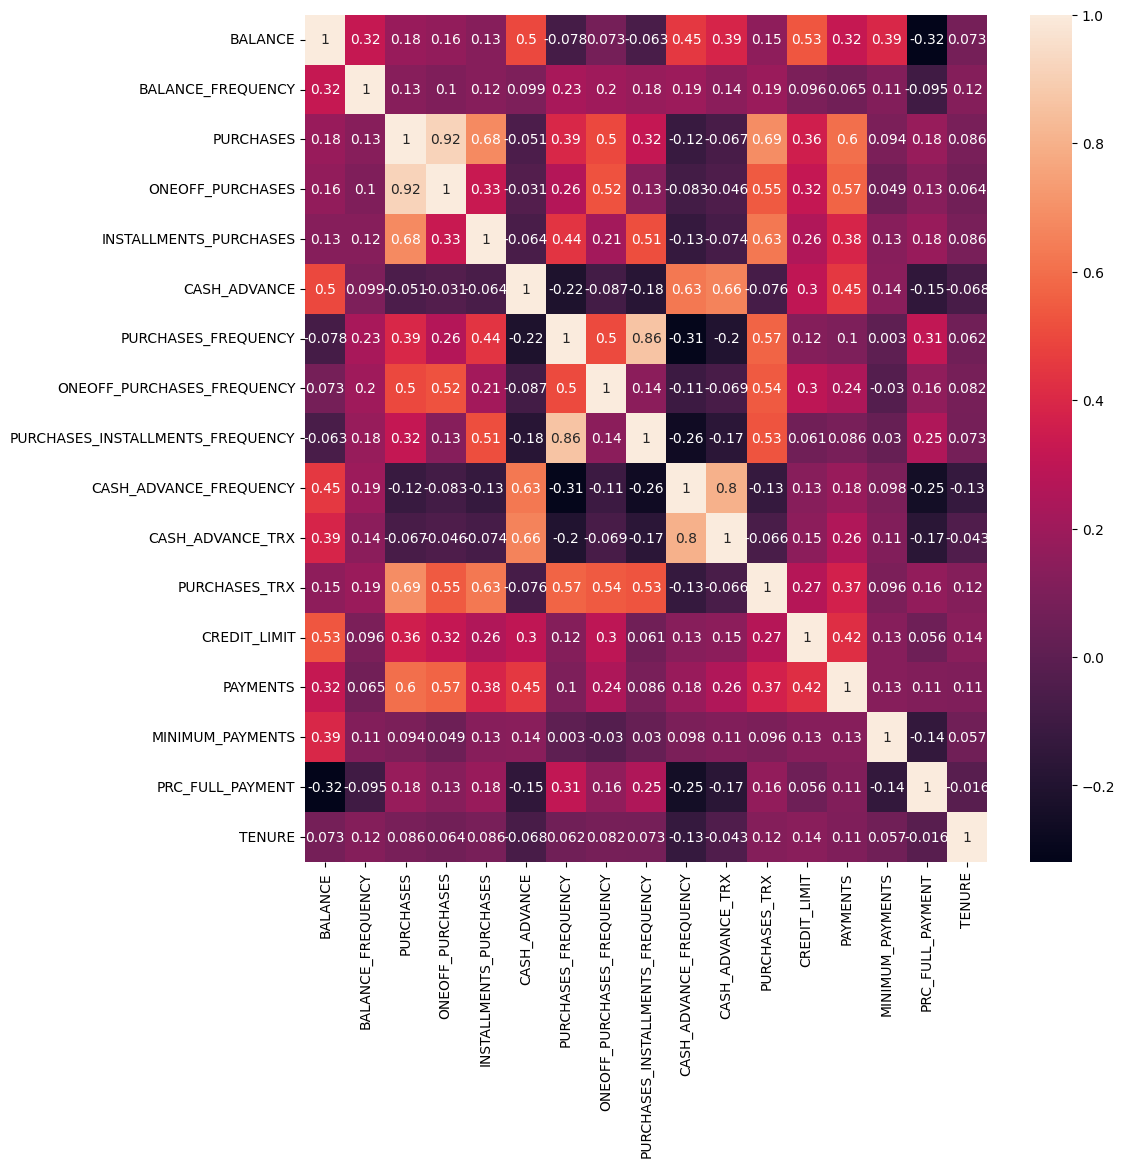

In [13]:
plt.rcParams["figure.figsize"] = (11,11)
sns.heatmap(df.corr(), annot = True)
plt.show()

Scaling the dataframe:

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df = scaler.fit_transform(df)

Applying Dimensionality Reduction Technique PCA: Principal Component Analysis is a technique that transforms high-dimensions data into lower-dimension while retaining as much information as possible for easy interpretation and visualization of data

In [85]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-1.682224,-1.076453
1,-1.138315,2.506470
2,0.969703,-0.383514
3,-0.873627,0.043166
4,-1.599438,-0.688583
...,...,...
8945,-0.359628,-2.016147
8946,-0.564358,-1.639120
8947,-0.926202,-1.810787
8948,-2.336555,-0.657968


Model Building using KMeans:

Finding 'k' value by Elbow Method:
Determining the ideal number of clusters for our k-means model can be done by measuring the sum of the squared distances to the nearest cluster center aka inertia.

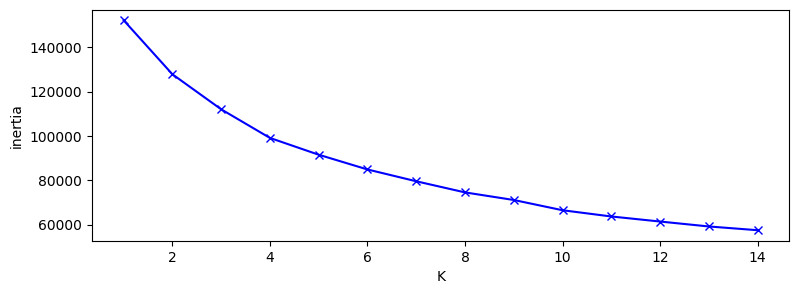

In [121]:
inertia = []
k_range= range(1,15)
for k in k_range:
    km  = KMeans(n_clusters = k)
    km.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('inertia')
plt.plot(k_range,inertia,'bx-')
plt.rcParams["figure.figsize"] = (3,9)
plt.show()

K value can be taken as 4 as per the above elbow plot.

In [122]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [123]:
kmeans_model.cluster_centers_

array([[-3.21563168e-01,  2.42834180e-01,  1.09202538e-01,
         1.03263702e-03,  2.56083414e-01, -3.66342783e-01,
         9.83944240e-01,  3.17448516e-01,  8.74233832e-01,
        -4.62535554e-01, -3.60269003e-01,  2.97165550e-01,
        -7.72805972e-02, -1.38377262e-01, -9.17787359e-02,
         3.95089230e-01,  5.76539298e-02],
       [-2.68832641e-01, -3.71737043e-01, -3.43134050e-01,
        -2.30513847e-01, -3.87639619e-01, -1.85358459e-01,
        -7.96603419e-01, -3.88847034e-01, -7.13595103e-01,
        -1.05555075e-01, -1.68133628e-01, -4.74888533e-01,
        -3.36143298e-01, -2.63377264e-01, -1.19899354e-01,
        -2.58302424e-01, -5.22546460e-02],
       [ 1.44958128e+00,  3.84850762e-01, -2.38731480e-01,
        -1.67907411e-01, -2.56088664e-01,  1.67201682e+00,
        -5.12839705e-01, -2.19532320e-01, -4.56030766e-01,
         1.73594596e+00,  1.60507902e+00, -2.88017900e-01,
         8.29410385e-01,  5.95306941e-01,  4.85800014e-01,
        -4.06235064e-01, -9.9

In [124]:
kmeans_model.labels_

array([1, 2, 0, ..., 0, 1, 1])

In [ ]:
Reducing centers:
Reducing the cluster centers using PCA.

In [82]:
cluster_centers=pca.transform(kmeans_model.cluster_centers_)
cluster_centers

array([[-0.4719511 ,  3.50447854],
       [ 0.959278  , -1.11146045],
       [-1.34080979, -0.19203449],
       [ 6.51972647,  0.75171439]])

Visualizing the clustered dataframe:

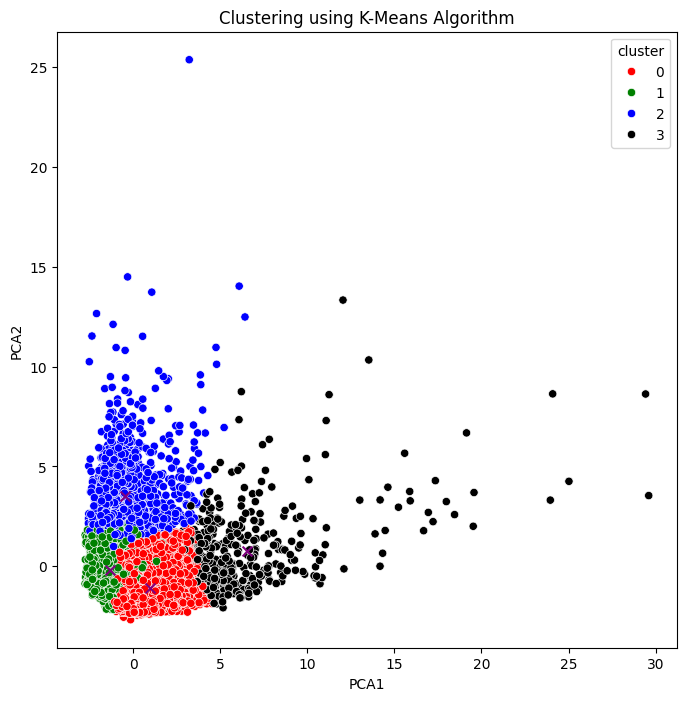

In [125]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='x',s=50,c='purple')
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [132]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])

# inverse transform the data
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns =[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,895.168237,0.934796,1236.517739,594.151337,642.640698,210.633184,0.885255,0.297159,0.711880,0.042586,0.790255,22.096257,4213.271020,1332.555238,650.320070,0.269271,11.594474
1,1004.922378,0.789210,270.093646,209.831597,60.529947,590.165765,0.170635,0.086457,0.080836,0.114022,2.101438,2.905879,3271.422605,970.692479,584.786156,0.078166,11.447388
2,4581.655892,0.968438,493.151346,313.745458,179.489843,4485.168482,0.284523,0.136967,0.183199,0.482525,14.202312,7.550784,7512.183770,3456.499115,1996.342983,0.034898,11.384806
3,3556.148177,0.986911,7680.432073,5099.738293,2582.157195,686.680975,0.946548,0.739667,0.788577,0.073149,2.170732,89.309756,9711.097561,7301.419079,1977.054411,0.286211,11.951220


In [133]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'CLUSTER':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [134]:
cluster1_df = cluster_df[cluster_df['CLUSTER']== 0]
cluster1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,0
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,0
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.00,6,0
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.25,6,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,275.861322,864.206542,0.00,6,0


In [135]:
cluster2_df = cluster_df[cluster_df['CLUSTER']== 1]
cluster2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,1
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,1
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6,1
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,1
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,1
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,1


In [136]:
cluster3_df = cluster_df[cluster_df['CLUSTER']== 2]
cluster3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,2
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,2
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,2
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,2
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,2
8869,2171.222526,1.000000,791.18,791.18,0.00,2056.602480,0.428571,0.428571,0.000000,0.571429,6,8,3000.0,300.088696,453.100425,0.000000,7,2
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6,2


In [137]:
cluster4_df = cluster_df[cluster_df['CLUSTER']== 3]
cluster4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,3
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,3
57,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,3
84,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,3
90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,10500.0,1650.425296,1067.515656,0.000000,12,3
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,3
8662,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,3000.0,5024.430008,218.172915,0.083333,12,3
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,3


<Axes: xlabel='CLUSTER', ylabel='count'>

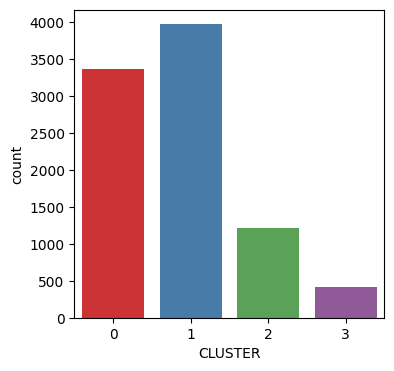

In [138]:

#Visualization
plt.rcParams["figure.figsize"] = (4,4)
sns.countplot(data=cluster_df, x = 'CLUSTER',palette = "Set1")


Visualizing various features for each cluster:

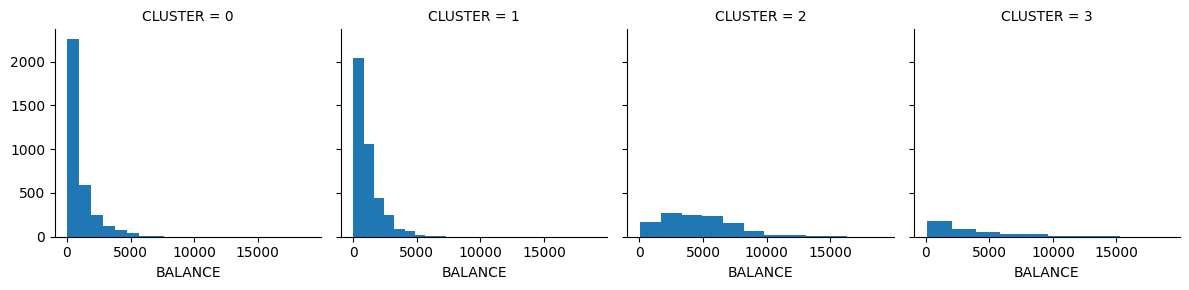

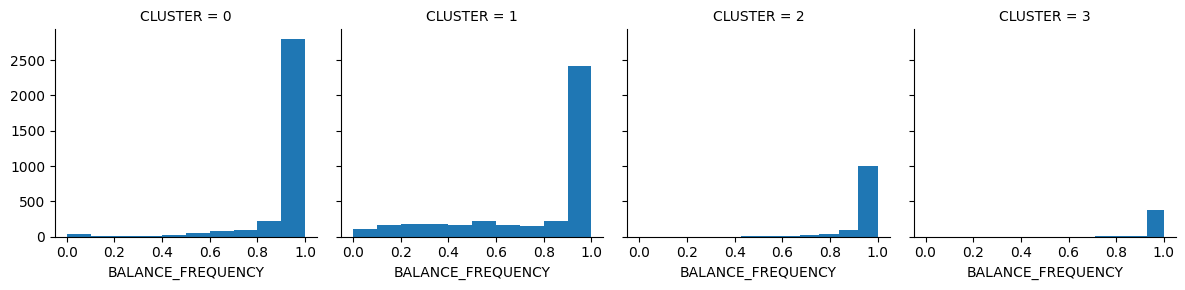

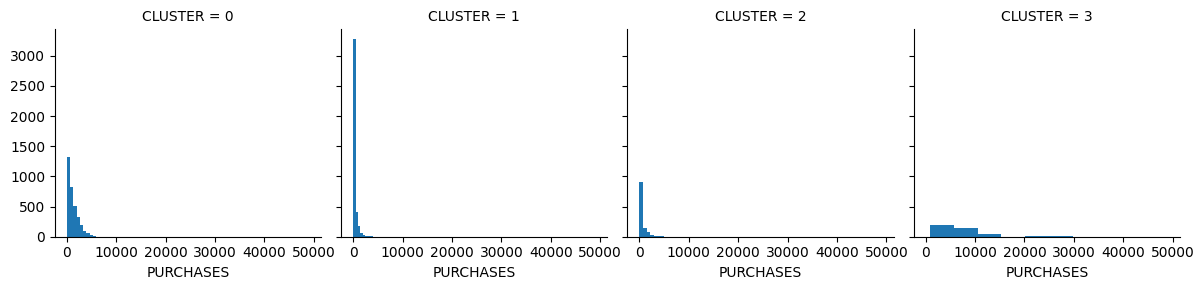

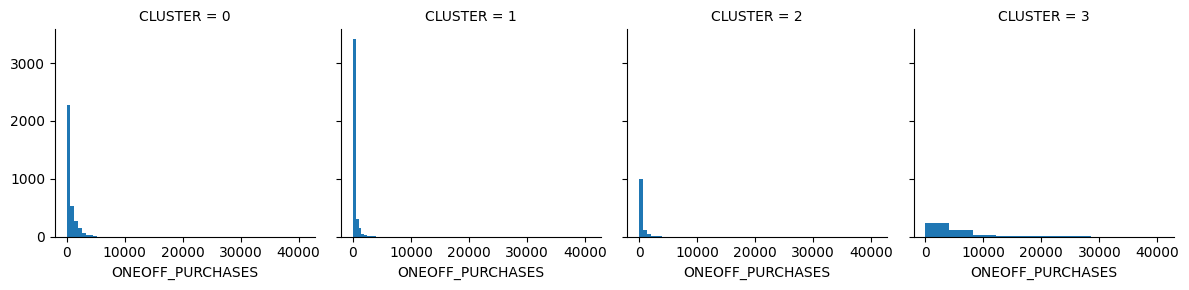

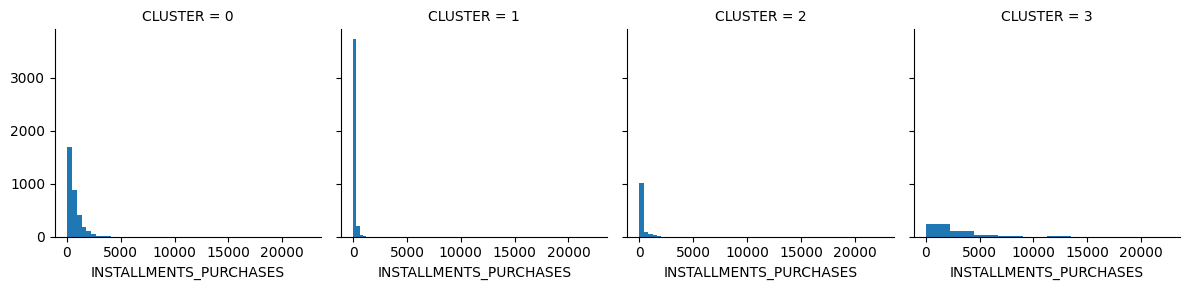

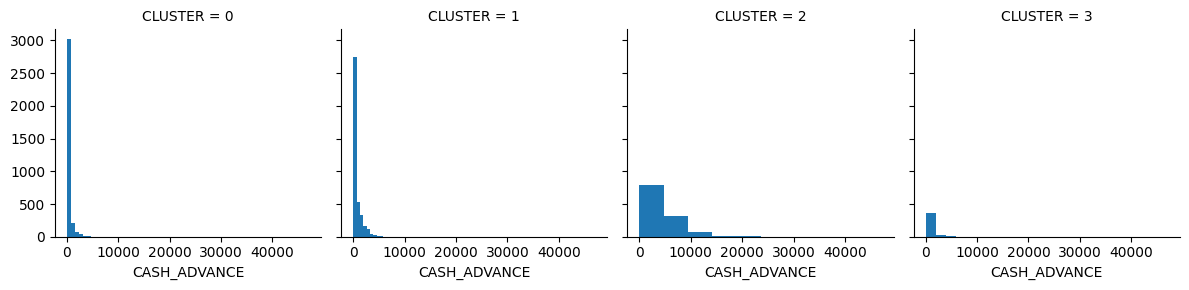

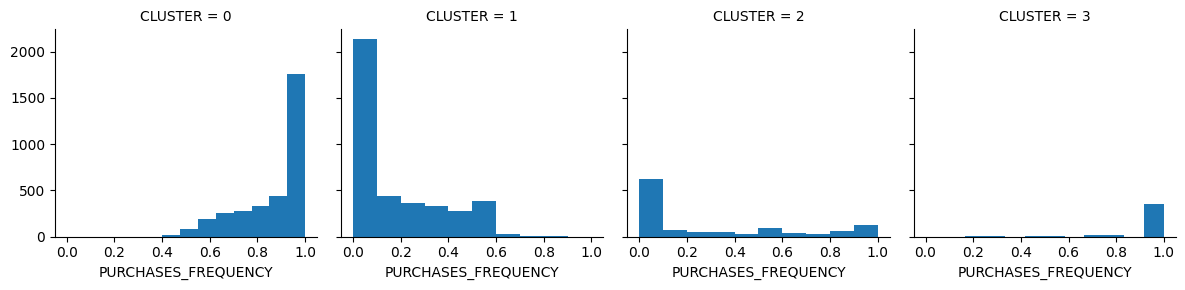

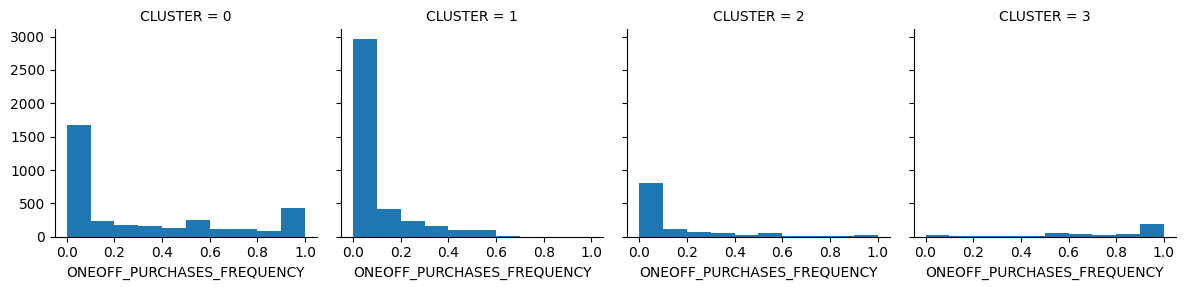

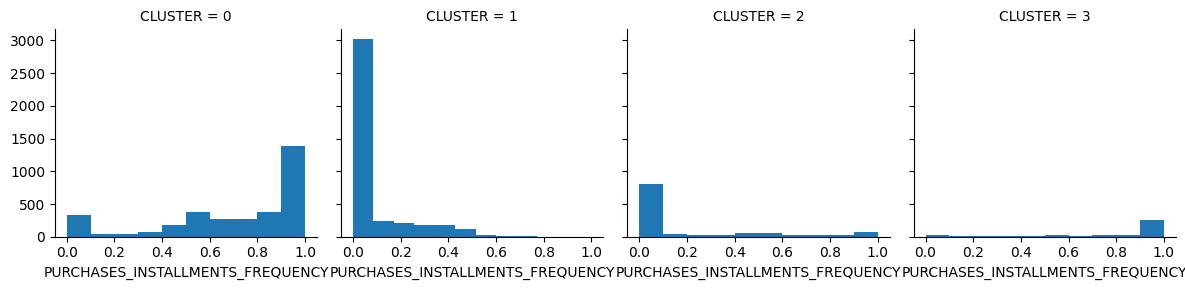

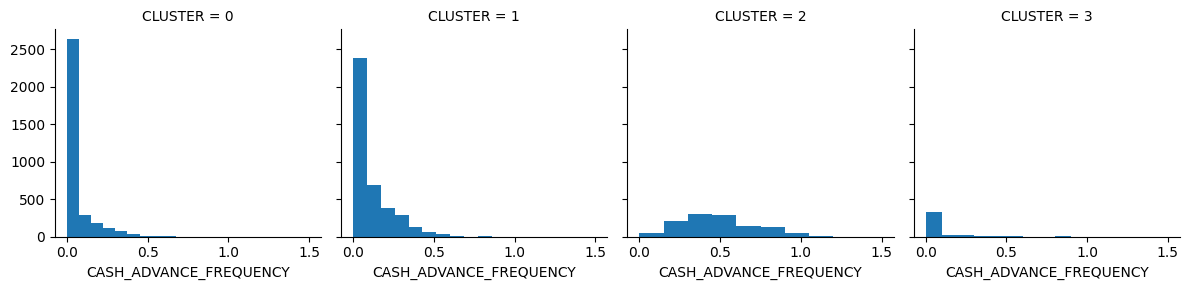

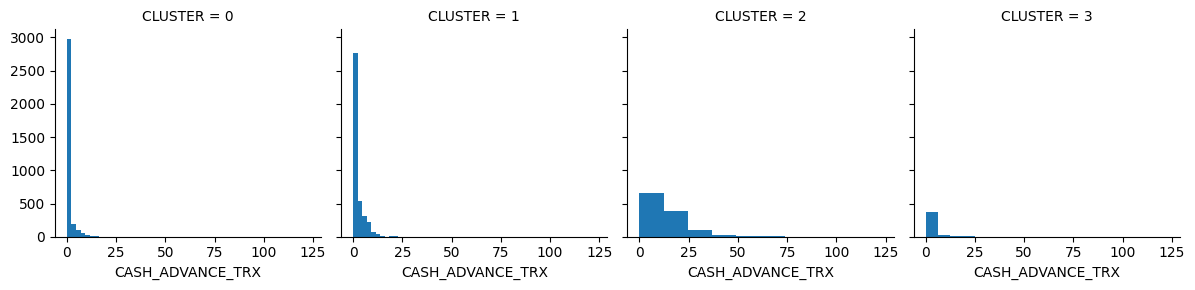

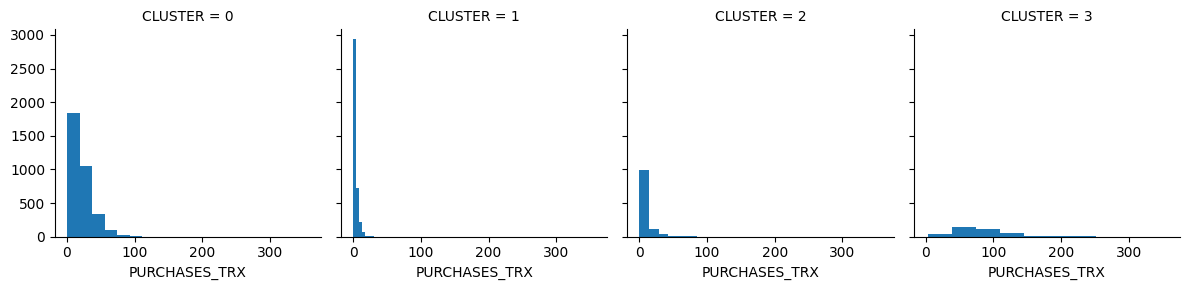

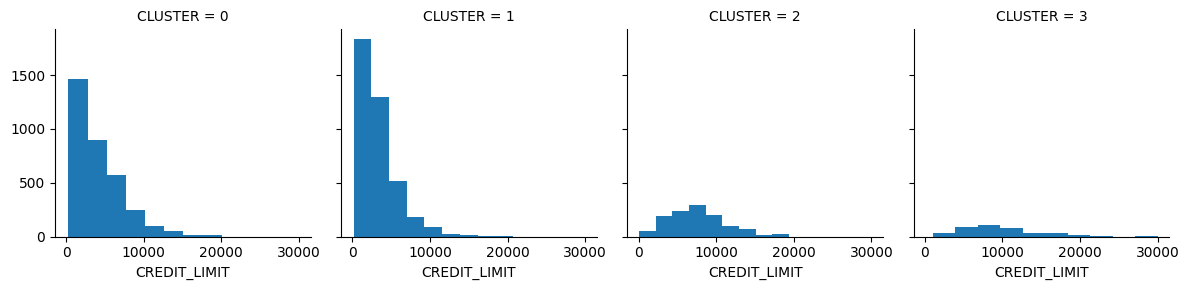

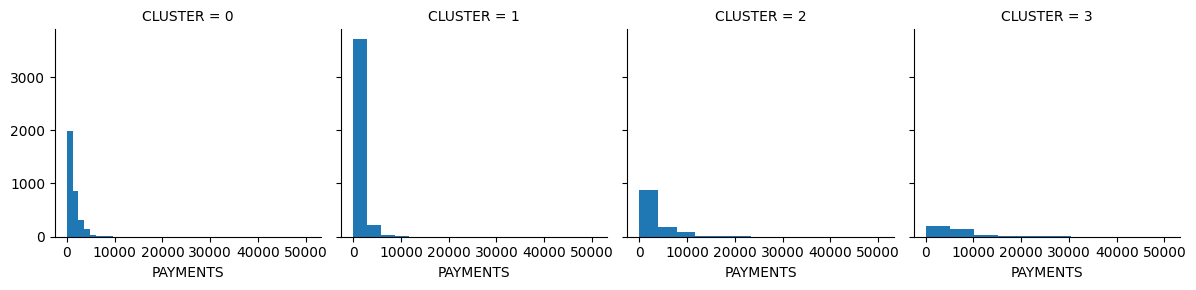

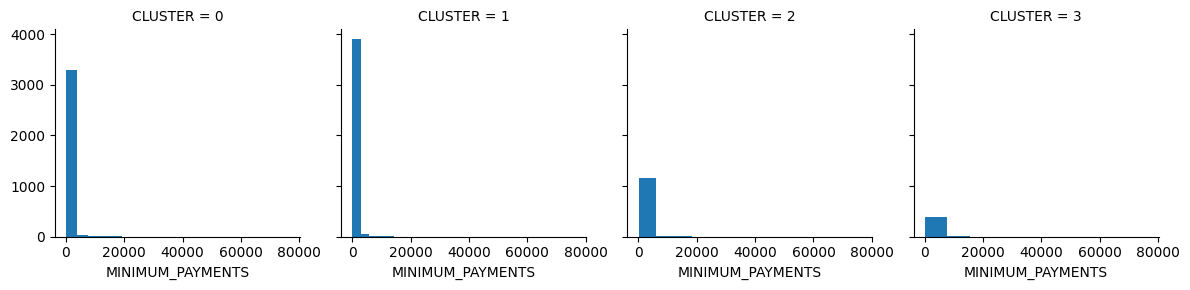

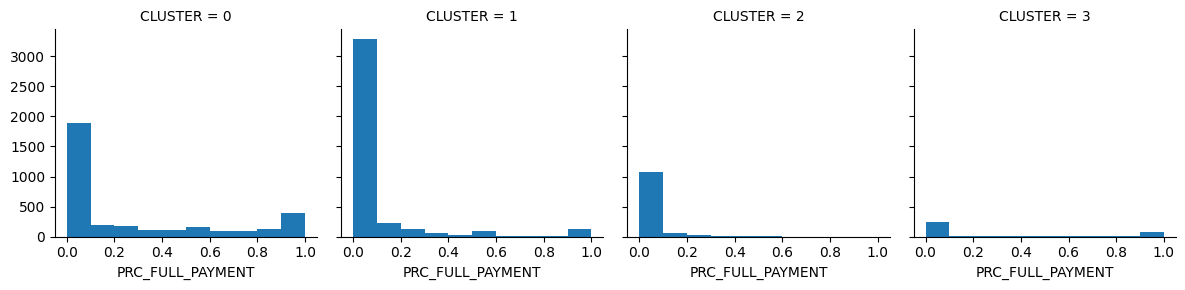

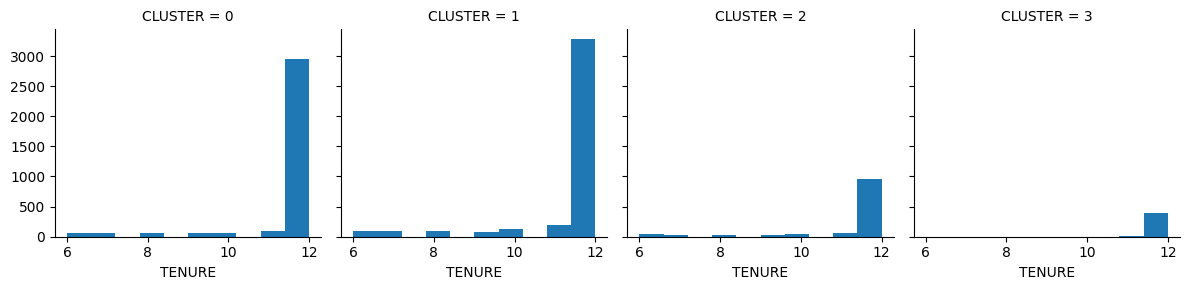

In [48]:
for c in cluster_df.drop(columns =['CLUSTER'], axis = 1):
    grid = sns.FacetGrid(cluster_df,col = 'CLUSTER')
    grid = grid.map(plt.hist,c)
plt.show()

Saving the kmeans clustering model and the data with cluster label

In [49]:
import joblib
joblib.dump(kmeans_model, 'kmeansmodel_joblib')

['kmeansmodel_joblib']

In [51]:
cluster_df.to_csv('Clustered_customer_data.csv')

Training and Testing the model

In [55]:
X = cluster_df.drop('CLUSTER', axis = 1)
y = cluster_df[['CLUSTER']]

In [56]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [57]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
958,192.037218,0.909091,1000.00,1000.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1500.0,1128.431348,157.317690,0.090909,12
7374,11.772828,0.272727,101.00,101.00,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,1200.0,164.865563,168.403178,0.000000,12
959,1493.440295,1.000000,0.00,0.00,0.0,77.328556,0.000000,0.000000,0.000000,0.250000,3,0,1600.0,455.872747,430.722903,0.000000,12
8779,525.143055,0.571429,0.00,0.00,0.0,1019.874229,0.000000,0.000000,0.000000,0.142857,4,0,1200.0,200.106080,130.914400,0.000000,7
1303,1426.870236,1.000000,0.00,0.00,0.0,98.687898,0.000000,0.000000,0.000000,0.083333,1,0,1500.0,324.970950,642.629679,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,306.460387,1.000000,0.00,0.00,0.0,191.834575,0.000000,0.000000,0.000000,0.083333,1,0,7000.0,577.962789,171.809634,0.083333,12
4114,2778.737121,1.000000,1973.00,1973.00,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,6500.0,630.766685,728.216731,0.000000,12
8191,0.000000,0.000000,52.50,0.00,52.5,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,3000.0,57.506797,864.206542,0.000000,12
1110,4294.953211,1.000000,0.00,0.00,0.0,7700.897042,0.000000,0.000000,0.000000,0.666667,28,0,7000.0,3129.359671,1138.592178,0.000000,12


In [58]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5009,41.049799,0.727273,413.31,133.31,280.0,0.000000,0.583333,0.083333,0.416667,0.000000,0,8,6000.0,475.939508,106.476161,0.625,12
8686,45.972648,1.000000,0.00,0.00,0.0,90.651341,0.000000,0.000000,0.000000,0.083333,1,0,500.0,120.805392,122.432543,0.125,12
4332,3.005343,0.333333,0.00,0.00,0.0,265.334594,0.000000,0.000000,0.000000,0.111111,1,0,1200.0,1233.178997,1.334075,0.000,9
4535,4995.229116,1.000000,1580.34,1364.34,216.0,0.000000,1.000000,1.000000,0.416667,0.000000,0,26,5500.0,1712.233039,1485.721729,0.000,12
6479,11304.517550,1.000000,105.83,105.83,0.0,3451.163531,0.333333,0.333333,0.000000,0.583333,12,4,11500.0,1987.223626,5037.236980,0.000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5993,4383.571529,1.000000,0.00,0.00,0.0,1805.853456,0.000000,0.000000,0.000000,0.333333,6,0,5000.0,1161.700956,994.581254,0.000,12
2502,5550.171932,1.000000,1026.26,1026.26,0.0,256.963408,0.583333,0.583333,0.000000,0.083333,1,12,11000.0,1322.742820,1417.698150,0.000,12
7831,0.000000,0.000000,110.40,0.00,110.4,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,0.000000,864.206542,0.000,12
903,7143.680599,1.000000,0.00,0.00,0.0,2999.900367,0.000000,0.000000,0.000000,0.250000,3,0,13000.0,8733.203270,1927.887547,0.000,12


In [60]:
#Decision tree:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

In [62]:
model.score(X_test,y_test)

0.9292364990689013

In [64]:
#Confusion Matrix:
print(metrics.confusion_matrix(y_test,y_predicted))


[[ 934   38   11    7]
 [  40 1132   21    1]
 [  13   33  332    5]
 [  18    2    1   97]]


In [65]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       990
           1       0.94      0.95      0.94      1194
           2       0.91      0.87      0.89       383
           3       0.88      0.82      0.85       118

    accuracy                           0.93      2685
   macro avg       0.92      0.90      0.90      2685
weighted avg       0.93      0.93      0.93      2685



Saving the Decision tree model for future prediction

In [140]:
import joblib
joblib.dump(model, 'finalmodel_joblib')

#To load the model:
mj = joblib.load('finalmodel_joblib')
result = mj.score(X_test, y_test)
print(result,'% Acuuracy')



0.9292364990689013 % Acuuracy
